In [53]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [54]:
def mode_reals(array, bins=150):
    counts, bin_edges = np.histogram(array, bins=bins)
    # Take left edges as approximation for bin midpoint
    bins_left_edges = bin_edges[:-1]
    return bins_left_edges[np.argmax(counts)]
import pickle

In [2]:
base_path = '/Users/ratzenboe/Library/CloudStorage/Dropbox/work/data/yso_study_simulation/'

data_set_infos = {
    'cluster_500pc_3Myr': {
        'fpath': base_path + 'simulated_data/mock_cluster_500pc_3Myr_May2024_sagitta.csv',
        'posterior_samples_path': base_path + 'posterior_samples/Model_sagitta-like_500pc_3Myr_cluster.pkl',
    },
    'test_data_allFeatures': {
        'fpath': base_path + 'simulated_data/sim_field_clusters_TrainTest_sagitta.csv',
        'posterior_samples_path': base_path + 'posterior_samples/posterior_samples_test_X_allFeatures__y_parallax_logAge.pkl'
    },
    'test_data_SEDonly': {
        'fpath': base_path + 'simulated_data/sim_field_clusters_TrainTest_sagitta.csv',
        'posterior_samples_path': base_path + 'posterior_samples/posterior_samples_test_X_SEDonly__y_parallax_logAge.pkl'
    },
    'test_data_Sagitta': {
        'fpath': base_path + 'simulated_data/sim_field_clusters_TrainTest_sagitta.csv',
        'posterior_samples_path': base_path + 'posterior_samples/posterior_samples_test_X_Sagitta__y_parallax_logAge.pkl'
    }
}

# Load data

In [59]:
test_name = 'test_data_allFeatures'
# df = pd.read_csv(data_set_infos[test_name]['fpath'])

In [60]:
# df_test = df.loc[df.test_samples].copy()

# Load posterior samples

In [61]:
with open(data_set_infos[test_name]['posterior_samples_path'], "rb") as handle:
    post_info = pickle.load(handle)

In [39]:
# # Choose posterior summary function between e.g., mode_reals, np.mean, np.median
# f_summary = np.mean
# 
# dist_pred = np.array([f_summary(1000/post_info[i]['plx_post']) for i in df_test.id.values])
# dist_true = np.array([1000/post_info[i]['plx_true'] for i in df_test.id.values])
# dist_obs = 1000/df_test['parallax_obs'].values
# 
# logAge_pred = np.array([f_summary(post_info[i]['logAge_post']) for i in df_test.id.values])
# logAge_std = np.array([np.std(post_info[i]['logAge_post']) for i in df_test.id.values])
# logAge_true = np.array([post_info[i]['logAge_true'] for i in df_test.id.values])

In [62]:
dist_std = np.array([np.std(1000/post_info[i]['plx_post']) for i in df_test.id.values])

In [63]:
df_test[f'dist_pred_std_{test_name}'] = dist_std

# Save mean inferred ages and standard deviations for each model

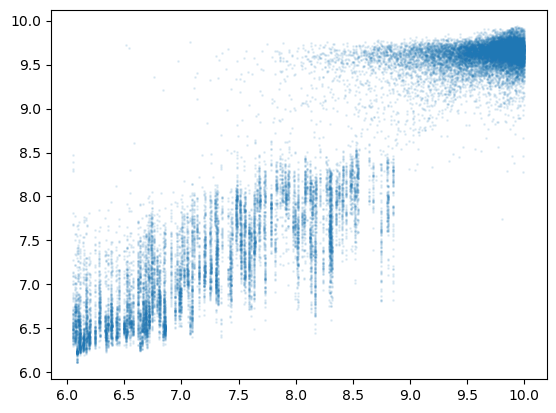

In [40]:
plt.scatter(logAge_true, logAge_pred, s=1, alpha=0.1)

In [25]:
df_test[f'logAge_pred_{test_name}'] = logAge_pred
df_test[f'logAge_pred_std_{test_name}'] = logAge_std
df_test[f'dist_pred_{test_name}'] = dist_pred

In [64]:
df_test.to_csv(base_path + 'simulated_data/mock_solar_nbh_test_set_predictions_NEW.csv', index=False)

In [29]:
df_test = pd.read_csv('/Users/ratzenboe/Library/CloudStorage/Dropbox/work/data/yso_study_simulation/simulated_data/mock_solar_nbh_test_set_predictions.csv')

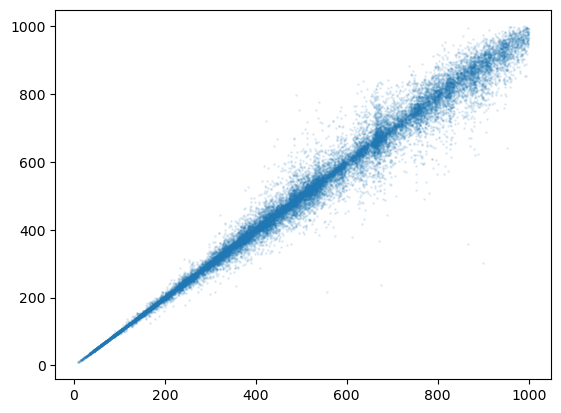

In [43]:
plt.scatter(dist_true, df_test[f'dist_pred_test_data_Sagitta'], s=1, alpha=0.1)

# Predicted vs. real scatter plot

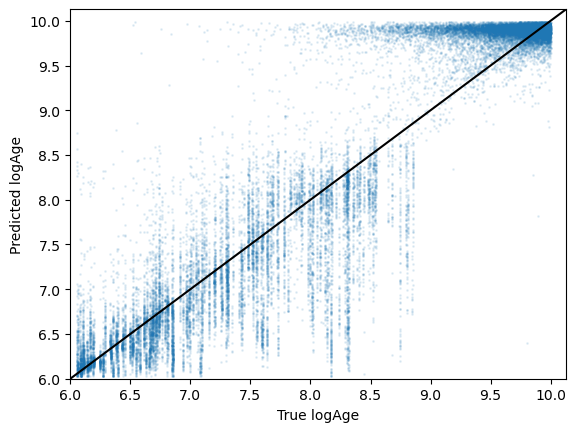

In [508]:
plt.scatter(logAge_true, logAge_pred, s=1, alpha=0.1)

plt.xlabel('True logAge')
plt.ylabel('Predicted logAge')
min_age, max_age = 6, 10.13
plt.plot([min_age, max_age], [min_age, max_age], color='k')
plt.xlim(min_age, max_age)
plt.ylim(min_age, max_age)
plt.show()

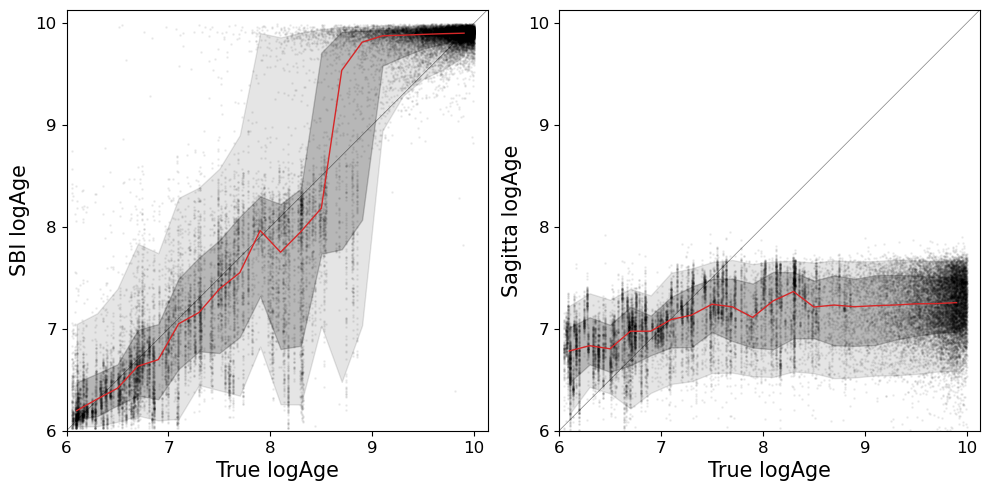

In [509]:
plt.subplots(1, 2, figsize=(10, 5))

scatter_kwargs = dict(s=1, alpha=0.05, c='k')
line_kwargs = dict(color='k', ls='-', lw=0.5, alpha=0.5)
err_band_3s_kwargs = dict(alpha=0.1, color='k')
err_band_1s_kwargs = dict(alpha=0.2, color='k')
median_fit_kwargs = dict(color='tab:red', lw=1)

plt.subplot(1, 2, 1)
# Plot a band of 1 sigma around the median
plt.scatter(logAge_true, logAge_pred, **scatter_kwargs)
bin_width = 0.2
min_age = 6
max_age = 10.13
plt.plot([min_age, max_age], [min_age, max_age], **line_kwargs)

bins = np.arange(6, 10.4, bin_width)
bin_x = []
bin_medians = []
lo_3s_err = []
hi_3s_err = []
lo_1s_err = []
hi_1s_err = []

for i, bin in enumerate(bins[:-1]):
    cut_bin = (logAge_true > bin) & (logAge_true <= bins[i+1])
    if np.sum(cut_bin) == 0:
        continue
    lo_3s, lo_1s, med, hi_1s, hi_3s = np.percentile(
        logAge_pred[cut_bin],  [50-95.4/2, 16, 50, 84, 50+95.4/2]
    )
    bin_medians.append(med)
    lo_3s_err.append(lo_3s)
    lo_1s_err.append(lo_1s)
    hi_1s_err.append(hi_1s)
    hi_3s_err.append(hi_3s)
    bin_x.append(bin + bin_width/2)

bin_medians = np.array(bin_medians)
lo_3s_err = np.array(lo_3s_err)
lo_1s_err = np.array(lo_1s_err)
hi_1s_err = np.array(hi_1s_err)
hi_3s_err = np.array(hi_3s_err)

plt.fill_between(bin_x, lo_1s_err, hi_1s_err, **err_band_1s_kwargs)
plt.fill_between(bin_x, lo_3s_err, hi_3s_err, **err_band_3s_kwargs)
plt.plot(bin_x, bin_medians, color='tab:red', lw=1)

plt.xlim(6, 10.13)
plt.ylim(6, 10.13)
plt.xticks(np.arange(6, 11), fontsize=12)
plt.yticks(np.arange(6, 11), fontsize=12)
plt.xlabel('True logAge', fontsize=15)
plt.ylabel('SBI logAge', fontsize=15)

plt.gca().set_aspect('equal', adjustable='box')


# ----------------
plt.subplot(1, 2, 2)
age_pred_name = 'age_est_sagitta'
plt.scatter(
    x=df_test['logAge'],
    y=df_test[age_pred_name],
    **scatter_kwargs
)

plt.plot([min_age, max_age], [min_age, max_age], **line_kwargs)

bins = np.arange(6, 10.4, bin_width)
bin_x = []
bin_medians = []
lo_3s_err = []
hi_3s_err = []
lo_1s_err = []
hi_1s_err = []
for i, bin in enumerate(bins[:-1]):
    cut_bin = (logAge_true > bin) & (logAge_true <= bins[i+1])
    if np.sum(cut_bin) == 0:
        continue
    lo_3s, lo_1s, med, hi_1s, hi_3s = np.percentile(
        df_test.loc[cut_bin, age_pred_name].values, [50-95.4/2, 16, 50, 84, 50+95.4/2]
    )
    bin_medians.append(med)
    lo_3s_err.append(lo_3s)
    lo_1s_err.append(lo_1s)
    hi_1s_err.append(hi_1s)
    hi_3s_err.append(hi_3s)
    bin_x.append(bin + bin_width/2)

bin_medians = np.array(bin_medians)
lo_3s_err = np.array(lo_3s_err)
lo_1s_err = np.array(lo_1s_err)
hi_1s_err = np.array(hi_1s_err)
hi_3s_err = np.array(hi_3s_err)

plt.fill_between(bin_x, lo_1s_err, hi_1s_err, **err_band_1s_kwargs)
plt.fill_between(bin_x, lo_3s_err, hi_3s_err, **err_band_3s_kwargs)
plt.plot(bin_x, bin_medians, **median_fit_kwargs)


plt.xlim(6, 10.13)
plt.ylim(6, 10.13)
plt.xticks(np.arange(6, 11), fontsize=12)
plt.yticks(np.arange(6, 11), fontsize=12)
plt.xlabel('True logAge', fontsize=15)
plt.ylabel('Sagitta logAge', fontsize=15)

plt.gca().set_aspect('equal', adjustable='box')

plt.tight_layout()
plt.savefig(f'/Users/ratzenboe/Desktop/figures/Fig-2-{test_name}.png', dpi=300, bbox_inches='tight')

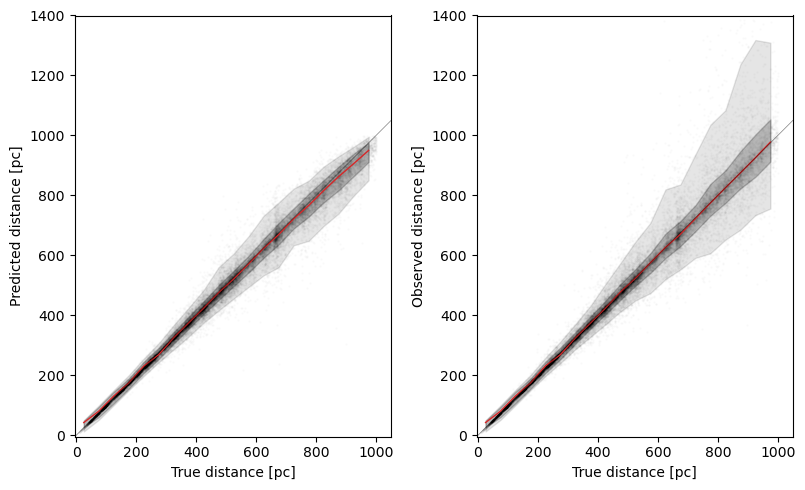

In [378]:
plt.subplots(1, 2, figsize=(10, 5))

for i, (dist_x, title_x) in enumerate(zip([dist_pred, dist_obs], ['Predicted', 'Observed'])):
    plt.subplot(1, 2, i+1)
    plt.scatter(dist_true, dist_x, s=1, alpha=0.01, c='k')

    bin_width = 50
    bins = np.arange(0, 1000+bin_width, bin_width)
    bin_medians = []
    lo_3s_err = []
    hi_3s_err = []
    lo_1s_err = []
    hi_1s_err = []
    bin_x = []
    for i, bin in enumerate(bins[:-1]):
        cut_bin = (dist_true > bin) & (dist_true <= bins[i+1])
        if np.sum(cut_bin) == 0:
            continue

        lo_3s, lo_1s, med, hi_1s, hi_3s = np.percentile(
            dist_x[cut_bin], [50-95.4/2, 16, 50, 84, 50+95.4/2]
        )
        bin_medians.append(med)
        lo_3s_err.append(lo_3s)
        lo_1s_err.append(lo_1s)
        hi_1s_err.append(hi_1s)
        hi_3s_err.append(hi_3s)
        bin_x.append(bin + bin_width/2)

    bin_medians = np.array(bin_medians)
    lo_3s_err = np.array(lo_3s_err)
    lo_1s_err = np.array(lo_1s_err)
    hi_1s_err = np.array(hi_1s_err)
    hi_3s_err = np.array(hi_3s_err)
    plt.fill_between(bin_x, lo_1s_err, hi_1s_err, **err_band_1s_kwargs)
    plt.fill_between(bin_x, lo_3s_err, hi_3s_err, **err_band_3s_kwargs)
    plt.plot(bin_x, bin_medians, color='tab:red', lw=1)

    plt.xlabel(f'True distance [pc]')
    plt.ylabel(f'{title_x} distance [pc]')
    min_dist, max_dist = -5, 1400
    plt.plot([min_dist, max_dist], [min_dist, max_dist], color='k', ls='-', lw=0.5, alpha=0.5)
    plt.xlim(min_dist, 1050)
    plt.ylim(min_dist, max_dist)
    plt.gca().set_aspect('equal', adjustable='box')

plt.tight_layout(w_pad=-10, h_pad=0)
# plt.savefig('/Users/ratzenboe/Desktop/figures/Fig-3-SEDonly.png', dpi=300, bbox_inches='tight')

# Predicted minus real histogram plot

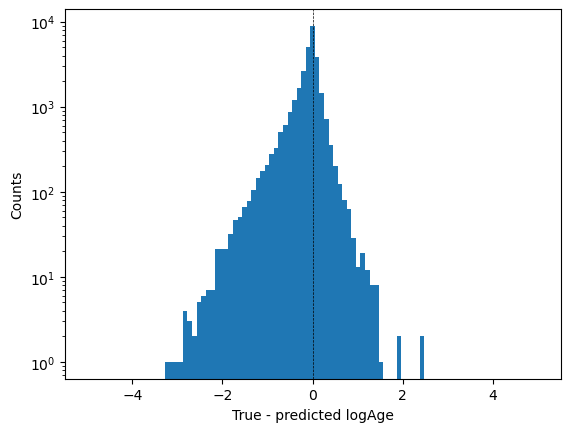

In [379]:
delta_logAge_lim = -5, 5  # limits should be -4, 4 for the test cases (for a full comparison with Sagitta)

plt.hist(logAge_true - logAge_pred, bins=np.linspace(*delta_logAge_lim, 100), log=True)
plt.xlabel('True - predicted logAge')
plt.ylabel('Counts')
plt.axvline(0, color='k', ls='--', lw=0.5)
plt.show()

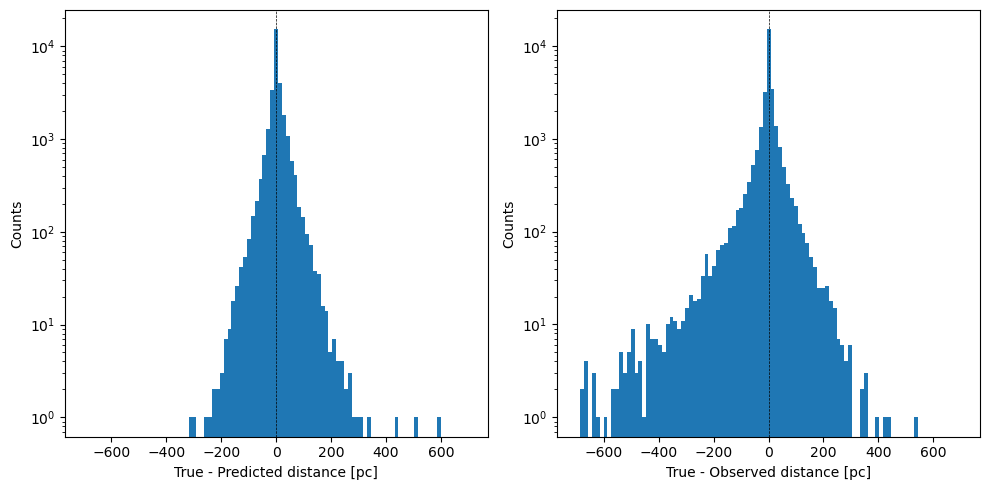

In [380]:
plt.subplots(1, 2, figsize=(10, 5))
delta_x_lim = -700, 700

for i, (dist_x, title_x) in enumerate(zip([dist_pred, dist_obs], ['Predicted', 'Observed'])):
    plt.subplot(1, 2, i+1)
    plt.hist(dist_true - dist_x, bins=np.linspace(*delta_x_lim, 100), log=True)
    plt.xlabel(f'True - {title_x} distance [pc]')
    plt.ylabel(f'Counts')
    plt.axvline(0, color='k', ls='--', lw=0.5)

plt.tight_layout()
plt.show()

# Plot Sagitta prediction vs. real

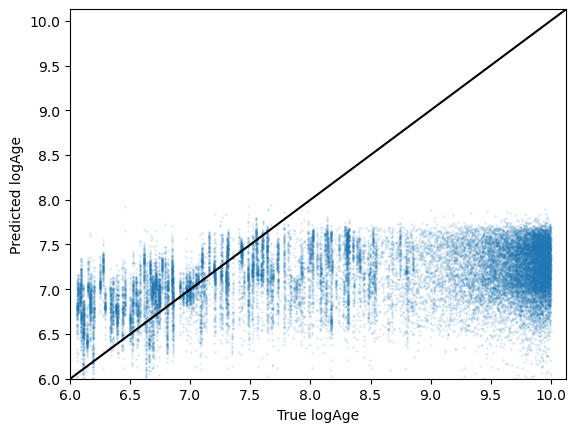

In [381]:
# Choose age prediction from Sagitta:
# age_mean_sagitta ... mean over MC samples
# age_median_sagitta ... median over MC samples
# age_est_sagitta ... point estimate

age_pred_name = 'age_est_sagitta'

plt.scatter(
    x=df_test['logAge'],
    y=df_test[age_pred_name],
    # bins=100
    s=1, alpha=0.1
)

plt.xlabel('True logAge')
plt.ylabel('Predicted logAge')
min_age, max_age = 6, 10.13
plt.plot([min_age, max_age], [min_age, max_age], color='k')
plt.xlim(min_age, max_age)
plt.ylim(min_age, max_age)
plt.show()

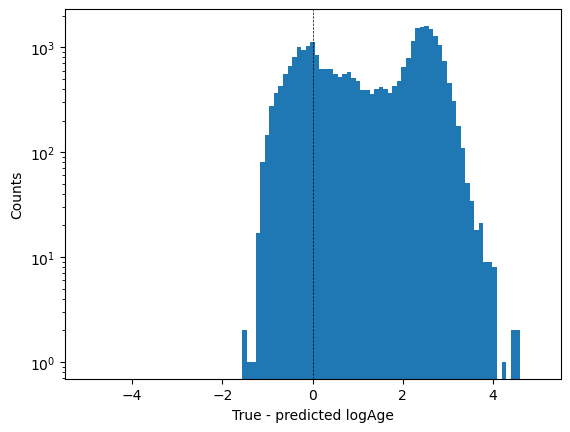

In [382]:
plt.hist(df_test['logAge'] - df_test[age_pred_name], bins=np.linspace(*delta_logAge_lim, 100), log=True)
plt.xlabel('True - predicted logAge')
plt.ylabel('Counts')
plt.axvline(0, color='k', ls='--', lw=0.5)
plt.show()

# X-Y plot - contamination & completeness

In [296]:
# Construct coolwarm color map with transition at given threshold
import matplotlib

def shiftedColorMap(cmap, start=0, midpoint=0.5, stop=1.0, name='shiftedcmap'):
    '''
    Function to offset the "center" of a colormap. Useful for
    data with a negative min and positive max and you want the
    middle of the colormap's dynamic range to be at zero.

    Input
    -----
      cmap : The matplotlib colormap to be altered
      start : Offset from lowest point in the colormap's range.
          Defaults to 0.0 (no lower offset). Should be between
          0.0 and `midpoint`.
      midpoint : The new center of the colormap. Defaults to
          0.5 (no shift). Should be between 0.0 and 1.0. In
          general, this should be  1 - vmax / (vmax + abs(vmin))
          For example if your data range from -15.0 to +5.0 and
          you want the center of the colormap at 0.0, `midpoint`
          should be set to  1 - 5/(5 + 15)) or 0.75
      stop : Offset from highest point in the colormap's range.
          Defaults to 1.0 (no upper offset). Should be between
          `midpoint` and 1.0.
    '''
    cdict = {
        'red': [],
        'green': [],
        'blue': [],
        'alpha': []
    }

    # regular index to compute the colors
    reg_index = np.linspace(start, stop, 257)

    # shifted index to match the data
    shift_index = np.hstack([
        np.linspace(0.0, midpoint, 128, endpoint=False),
        np.linspace(midpoint, 1.0, 129, endpoint=True)
    ])

    for ri, si in zip(reg_index, shift_index):
        r, g, b, a = cmap(ri)

        cdict['red'].append((si, r, r))
        cdict['green'].append((si, g, g))
        cdict['blue'].append((si, b, b))
        cdict['alpha'].append((si, a, a))

    newcmap = matplotlib.colors.LinearSegmentedColormap(name, cdict)
    matplotlib.colormaps.register(cmap=newcmap)
    return newcmap

orig_cmap = matplotlib.cm.coolwarm

min_age, max_age = 6.2, 9
transition_age = 7.78
midpoint = (transition_age - min_age) / (max_age - min_age)
shifted_cmap = shiftedColorMap(orig_cmap, midpoint=midpoint, name='shifted_coolwarm_60_6p2-9new')

In [297]:
from astropy.coordinates import SkyCoord, ICRS, Galactic
from astropy import units as u

In [298]:
# Compute predicted X,Y,Z positions
c_gal = SkyCoord(
    u=df_test.X_obs.values*u.pc,
    v=df_test.Y_obs.values*u.pc,
    w=df_test.Z_obs.values * u.pc,
    frame='galactic',
    representation_type='cartesian'
)
c_icrs = c_gal.transform_to(ICRS())
c_icrs.representation_type = 'spherical'

c = SkyCoord(ra=c_icrs.ra.value*u.deg, dec=c_icrs.dec.value*u.deg, distance=dist_pred * u.pc, frame='icrs')
c = c.transform_to(Galactic())
c.representation_type = 'cartesian'
df_test['X_pred'] = c.u.value
df_test['Y_pred'] = c.v.value
df_test['Z_pred'] = c.w.value

In [43]:
# Show only a subset of clusters, otherwise the plot becomes very crowded
n_plt_clusters = 50
labels_unique, count_unique = np.unique(df_test.loc[df_test.labels>-1, 'labels'], return_counts=True)
random_subset_clusters = np.random.choice(labels_unique, n_plt_clusters, replace=False)
cut_subset = df_test.labels.isin(random_subset_clusters.tolist() + [-1])
df_plt = df_test.loc[cut_subset]

(19013, 58)

/var/folders/q4/vrqcgjz9259cd9jkzmpv3zth0000gn/T/ipykernel_30448/1794094811.py:114: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  plt.tight_layout(w_pad=0.1, h_pad=.5)


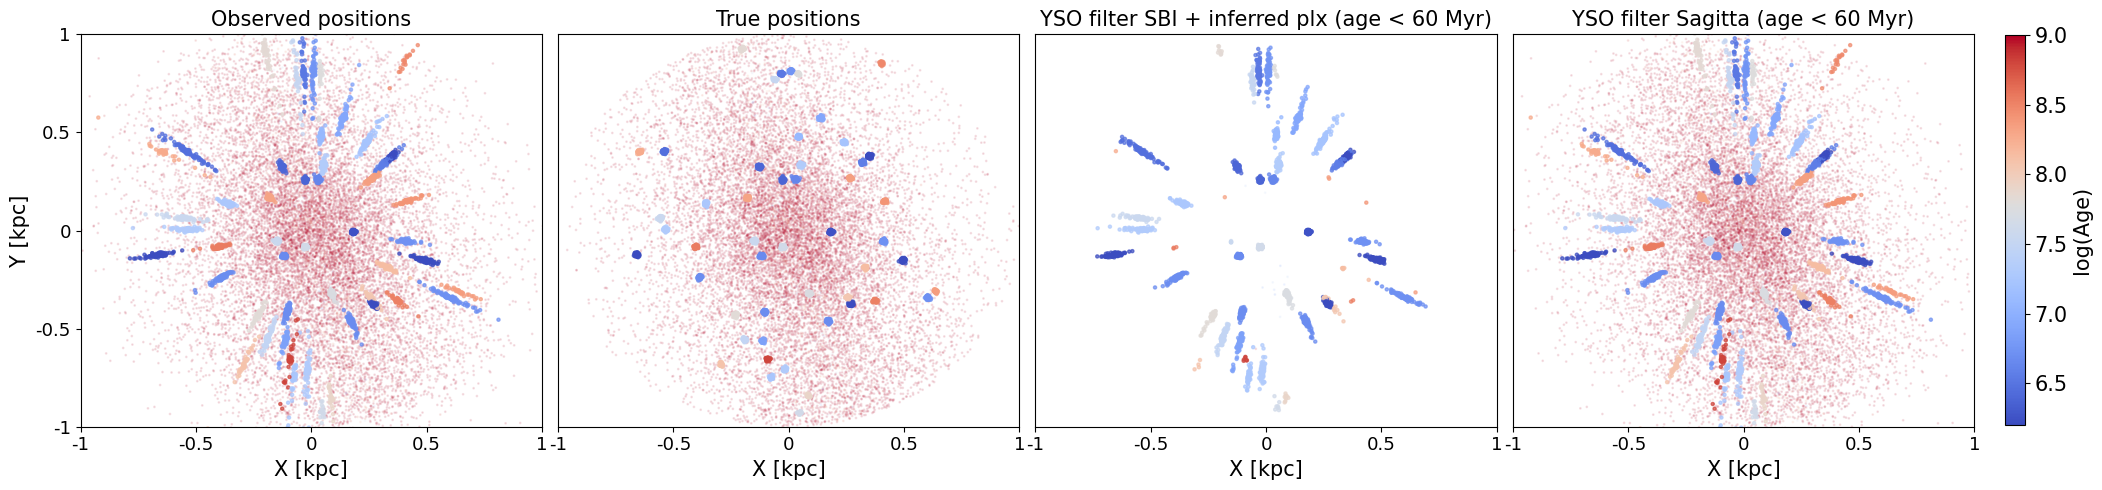

In [132]:
fig, axes = plt.subplots(1, 4, figsize=(20, 5), sharex=False, sharey=True) #, =0.1, wspace=0.1)
plt.subplot(1, 4, 1)
lim = 1000

equal_aspect = False

plt.scatter(
    df_plt.loc[df_plt.labels==-1, 'X_obs'], df_plt.loc[df_plt.labels==-1, 'Y_obs'],
    s=1, alpha=0.1,
    cmap=shifted_cmap, c=df_plt.loc[df_plt.labels==-1, 'logAge'], vmin=min_age, vmax=max_age
    #c='tab:grey'
)
plt.scatter(
    df_plt.loc[df_plt.labels!=-1, 'X_obs'], df_plt.loc[df_plt.labels!=-1, 'Y_obs'],
    s=5, alpha=0.7,
    cmap=shifted_cmap, c=df_plt.loc[df_plt.labels!=-1, 'logAge'], vmin=min_age, vmax=max_age
)

plt.xlabel('X [kpc]', fontsize=15)
plt.ylabel('Y [kpc]', fontsize=15)
plt.tick_params(axis='both', which='both', bottom=True, top=False, left=True, right=False, labelbottom=True, labelleft=True)
plt.yticks([-1000, -500, 0, 500, 1000], [-1, -0.5, 0, 0.5, 1], fontsize=13)
plt.xticks([-1000, -500, 0, 500, 1000], [-1, -0.5, 0, 0.5, 1], fontsize=13)
plt.xlim(-lim, lim)
plt.ylim(-lim, lim)
plt.title('Observed positions', fontsize=15)
if equal_aspect:
    plt.gca().set_aspect('equal', adjustable='box')


plt.subplot(1, 4, 2)
plt.scatter(
    df_plt.loc[df_plt.labels==-1, 'X'], df_plt.loc[df_plt.labels==-1, 'Y'],
    s=1, alpha=0.1,
    # c='tab:grey'
    cmap=shifted_cmap, c=df_plt.loc[df_plt.labels==-1, 'logAge'], vmin=min_age, vmax=max_age
)
plt.scatter(
    df_plt.loc[df_plt.labels!=-1, 'X'], df_plt.loc[df_plt.labels!=-1, 'Y'],
    s=5, alpha=0.7,
    cmap=shifted_cmap, c=df_plt.loc[df_plt.labels!=-1, 'logAge'], vmin=min_age, vmax=max_age
)
# plt.scatter(df_val['X'], df_val['Y'], s=2, alpha=0.1, cmap='coolwarm', c=logAge_true)
plt.xlabel('X [kpc]', fontsize=15)
plt.tick_params(axis='both', which='both', bottom=True, top=False, left=False, right=False, labelbottom=True, labelleft=False)
plt.xticks([-1000, -500, 0, 500, 1000], [-1, -0.5, 0, 0.5, 1], fontsize=13)
plt.xlim(-lim, lim)
plt.ylim(-lim, lim)
plt.title('True positions', fontsize=15)
if equal_aspect:
    plt.gca().set_aspect('equal', adjustable='box')


plt.subplot(1, 4, 3)
th = 7.78
cut_bg = (df_plt.labels==-1) & (logAge_pred[cut_subset]<th)
cut_sig = (df_plt.labels!=-1) & (logAge_pred[cut_subset]<th)

plt.scatter(
    df_plt.loc[cut_bg, 'X_pred'], df_plt.loc[cut_bg, 'Y_pred'],
    s=1, alpha=0.1,
    # c='tab:grey'
    cmap=shifted_cmap, c=df_plt.loc[cut_bg, 'logAge'], vmin=min_age, vmax=max_age
)
plt.scatter(
    df_plt.loc[cut_sig, 'X_pred'], df_plt.loc[cut_sig, 'Y_pred'],
    s=5, alpha=0.7,
    cmap=shifted_cmap, c=df_plt.loc[cut_sig, 'logAge'], vmin=min_age, vmax=max_age
)
plt.xlabel('X [kpc]', fontsize=15)
# Remove ticks
plt.tick_params(axis='both', which='both', bottom=True, top=False, left=False, right=False, labelbottom=True, labelleft=False)
plt.xticks([-1000, -500, 0, 500, 1000], [-1, -0.5, 0, 0.5, 1], fontsize=13)
plt.xlim(-lim, lim)
plt.ylim(-lim, lim)
plt.title(f'YSO filter SBI + inferred plx (age < {10**th/1e6:.0f} Myr)', fontsize=15)
if equal_aspect:
    plt.gca().set_aspect('equal', adjustable='box')


plt.subplot(1, 4, 4)
th = 7.78
cut_bg = (df_plt.labels==-1) & (df_plt.age_est_sagitta<th)
cut_sig_sag = (df_plt.labels!=-1) & (df_plt.age_est_sagitta<th)

plt.scatter(
    df_plt.loc[cut_bg, 'X_obs'], df_plt.loc[cut_bg, 'Y_obs'],
    s=1, alpha=0.1,
    # c='tab:grey'
    cmap=shifted_cmap, c=df_plt.loc[cut_bg, 'logAge'], vmin=min_age, vmax=max_age
)

scatter_plt = plt.scatter(
    df_plt.loc[cut_sig_sag, 'X_obs'], df_plt.loc[cut_sig_sag, 'Y_obs'],
    s=5, alpha=0.7,
    cmap=shifted_cmap, c=df_plt.loc[cut_sig_sag, 'logAge'], vmin=min_age, vmax=max_age
)
plt.xlabel('X [kpc]', fontsize=15)
# Remove ticks
plt.tick_params(axis='both', which='both', bottom=True, top=False, left=False, right=False, labelbottom=True, labelleft=False)
plt.xticks([-1000, -500, 0, 500, 1000], [-1, -0.5, 0, 0.5, 1], fontsize=13)
plt.xlim(-lim, lim)
plt.ylim(-lim, lim)
plt.title(f'YSO filter Sagitta (age < {10**th/1e6:.0f} Myr)', fontsize=15)
if equal_aspect:
    plt.gca().set_aspect('equal', adjustable='box')

cbar_ax = fig.add_axes([1.005, 0.14, 0.01, 0.78])
cbar = plt.colorbar(cax=cbar_ax, ticks=[6.5, 7, 7.5, 8., 8.5, 9]) #, fontsize=15)
cbar.ax.tick_params(labelsize=15)
cbar.set_label(label='log(Age)', size=15, labelpad=3)
cbar.solids.set(alpha=1)

plt.tight_layout(w_pad=0.1, h_pad=.5)
plt.savefig('/Users/ratzenboe/Desktop/figures/Fig-1_SEDonly.png', dpi=300, bbox_inches='tight')

In [88]:
# Compute contamination and completeness from confusion matrix
th_true = 7.78

def compute_completenes_contaminiation(age_pred, age_true, th, th_true=7.78):
    # True positive: YSOs with age < th
    # False positive: BG with age < th
    # True negative: BG with age >= th
    # False negative: YSOs with age >= th
    true_positive = np.sum((age_pred<th) & (age_true<th_true))
    false_positive = np.sum((age_pred<th) & (age_true>th_true))
    true_negative = np.sum((age_pred>th) & (age_true>th_true))
    false_negative = np.sum((age_pred>th) & (age_true<th_true))
    # Compute completeness and contamination
    # Completeness = TP / (TP + FN) ... also true positive rate, recall, or sensitivity
    completeness = true_positive / (true_positive + false_negative)
    # Contamination = FP / (TP + FP)
    contamination = false_positive / (true_positive + false_positive)
    # FP / (FP + TN) ... also false positive rate
    fpr = false_positive / (false_positive + true_negative)
    return completeness, contamination, fpr

completeness_sbi, contamination_sbi, fpr_sbi = compute_completenes_contaminiation(logAge_pred, logAge_true, th, th_true=th_true)
completeness_sagitta, contamination_sagitta, fpr_sagitta = compute_completenes_contaminiation(df_test['age_est_sagitta'], logAge_true, th)

In [89]:
completeness_sbi, contamination_sbi, fpr_sbi

(0.939634703196347, 0.037781726363041244, 0.02120734908136483)

In [90]:
completeness_sagitta, contamination_sagitta, fpr_sagitta

(0.9988127853881279, 0.6348978501802643, 0.9983727034120735)

/var/folders/q4/vrqcgjz9259cd9jkzmpv3zth0000gn/T/ipykernel_30448/1546777483.py:17: RuntimeWarning: invalid value encountered in scalar divide
  contamination = false_positive / (true_positive + false_positive)


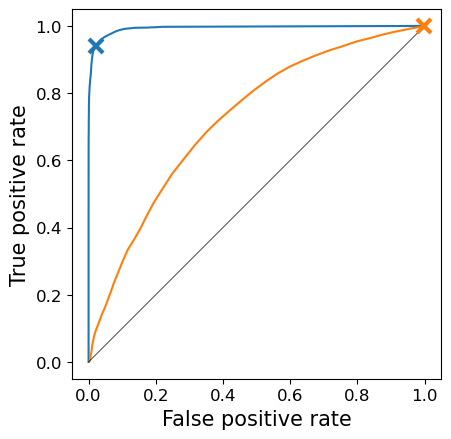

In [136]:
# Compute ROC curve by varying the threshold
def compute_roc_curve(age_pred, age_true, th_range, th_true=7.78):
    tpr_all = []
    fpr_all = []
    for th in th_range:
        tpr, _, fpr = compute_completenes_contaminiation(age_pred, age_true, th, th_true=th_true)
        tpr_all.append(tpr)
        fpr_all.append(fpr)
    return np.array(tpr_all), np.array(fpr_all)

th_range = np.linspace(6.0, 9., 100)

tpr_sbi, fpr_sbi = compute_roc_curve(logAge_pred, logAge_true, th_range, th_true=th_true)
tpr_sagitta, fpr_sagitta = compute_roc_curve(df_test['age_est_sagitta'], logAge_true, th_range, th_true=th_true)

plt.plot(fpr_sbi.tolist() + [1], tpr_sbi.tolist() + [1], label='SBI')
plt.plot(fpr_sagitta.tolist() + [1], tpr_sagitta.tolist() + [1], label='Sagitta')
plt.plot([0, 1], [0, 1], color='k', ls='-', lw=0.5)
#
plt.plot(
    fpr_sbi[np.isclose(th_range, 7.78787879)], tpr_sbi[np.isclose(th_range, 7.78787879)],
    ms=10, marker='x', mec='tab:blue', mew=3, ls="none"
)
plt.plot(
    fpr_sagitta[np.isclose(th_range, 7.78787879)], tpr_sagitta[np.isclose(th_range, 7.78787879)],
    ms=10, marker='x', mec='tab:orange', mew=3, ls="none"
)

plt.xlabel('False positive rate', size=15)
plt.ylabel('True positive rate', size=15)
# Tick size
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
# plt.legend(frameon=False, fontsize=15)
plt.gca().set_aspect('equal', adjustable='box')

plt.savefig('/Users/ratzenboe/Desktop/figures/Fig-ROC-vs-Sagitta.png', dpi=300, bbox_inches='tight')

# SNR plot

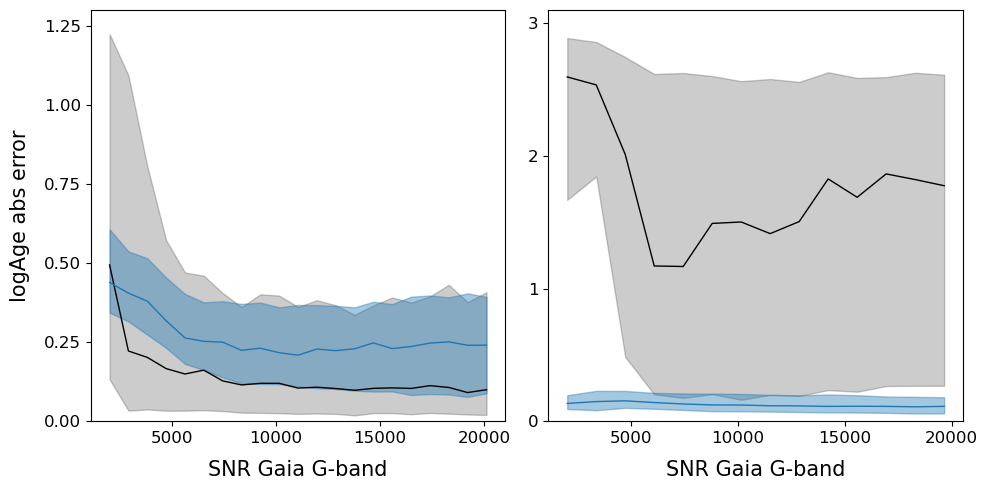

In [493]:
# snr_plx = df_test['parallax_obs'] / df_test['parallax_error']
snr = df_test['phot_g_mean_mag_obs'] / df_test['phot_g_mean_mag_error']

ylim = 0, 2.4
# bin_width = 0.1
# bins = np.arange(snr_plx.min(), snr_plx.max(), bin_width)
n_bins = 22
bins = np.linspace(snr.min()-1, 21_000, n_bins)

# Subplots
plt.subplots(1, 2, figsize=(10, 5), sharex=False, sharey=False)
plt.subplot(1, 2, 1)
# Plot SBI predictions
la_diffs_lo_1s = []
la_diffs_hi_1s = []
la_diffs_lo_2s = []
la_diffs_hi_2s = []
bin_x = []
bin_medians = []
la_std = []
la_std_lo_2s = []
la_std_hi_2s = []
# Sagitta
la_diffs_lo_1s_sag = []
la_diffs_hi_1s_sag = []
la_diffs_sag = []
for i, bin in enumerate(bins[:-1]):
    cut_bin = (snr > bin) & (snr <= bins[i+1])
    if np.sum(cut_bin) == 0:
        continue
    # lo_2s, lo_1s, med, hi_1s, hi_2s = np.percentile(
    lo_1s, med, hi_1s = np.percentile(
        abs(logAge_pred[cut_bin] - logAge_true[cut_bin]),
        [16, 50, 84]
    )
    lo_2s_std, med_std, hi_2s_std = np.percentile(
        logAge_std[cut_bin],
        [16, 50, 84]
    )
    bin_medians.append(med) #*1.48)
    la_diffs_lo_1s.append(lo_1s)
    la_diffs_hi_1s.append(hi_1s)
    # la_diffs_lo_2s.append(lo_2s)
    # la_diffs_hi_2s.append(hi_2s)
    bin_x.append(bin + bin_width/2)
    la_std.append(med_std)
    la_std_lo_2s.append(lo_2s_std)
    la_std_hi_2s.append(hi_2s_std)

bin_medians = np.array(bin_medians)
plt.fill_between(bin_x, la_diffs_lo_1s, la_diffs_hi_1s, **err_band_1s_kwargs)
# plt.fill_between(bin_x, la_diffs_lo_2s, la_diffs_hi_2s, **err_band_3s_kwargs)
plt.plot(bin_x, bin_medians, color='k', lw=1)
plt.plot(bin_x, la_std, color='tab:blue', lw=1)
plt.fill_between(bin_x, la_std_lo_2s, la_std_hi_2s, alpha=0.4, color='tab:blue')

plt.xlabel('SNR Gaia G-band', fontsize=15, labelpad=10)
plt.ylabel('logAge abs error', fontsize=15, labelpad=10)
plt.xticks([5000, 10_000, 15_000, 20_000], fontsize=12)
plt.yticks([0, 0.25, 0.5, 0.75, 1, 1.25], fontsize=12)
plt.ylim(0, 1.3)
# plt.yscale('log')

plt.subplot(1, 2, 2)

n_bins = 15
bins = np.linspace(snr.min()-1, 21_000, n_bins)

# Plot SBI predictions
la_diffs_lo_1s = []
la_diffs_hi_1s = []
la_diffs_lo_2s = []
la_diffs_hi_2s = []
bin_x = []
bin_medians = []
la_std = []
la_std_lo_2s = []
la_std_hi_2s = []
# Sagitta
la_diffs_lo_1s_sag = []
la_diffs_hi_1s_sag = []
la_diffs_sag = []
for i, bin in enumerate(bins[:-1]):
    cut_bin = (snr > bin) & (snr <= bins[i+1])
    if np.sum(cut_bin) == 0:
        continue
    # lo_2s, lo_1s, med, hi_1s, hi_2s = np.percentile(
    lo_1s, med, hi_1s = np.percentile(
        abs(df_test.loc[cut_bin, 'age_est_sagitta'] - logAge_true[cut_bin]),
        [16, 50, 84]
    )
    lo_2s_std, med_std, hi_2s_std = np.percentile(
        df_test.loc[cut_bin, 'age_std_sagitta'] ,
        [16, 50, 84]
    )
    bin_medians.append(med) #*1.48)
    la_diffs_lo_1s.append(lo_1s)
    la_diffs_hi_1s.append(hi_1s)
    # la_diffs_lo_2s.append(lo_2s)
    # la_diffs_hi_2s.append(hi_2s)
    bin_x.append(bin + bin_width/2)
    la_std.append(med_std)
    la_std_lo_2s.append(lo_2s_std)
    la_std_hi_2s.append(hi_2s_std)

bin_medians = np.array(bin_medians)
plt.fill_between(bin_x, la_diffs_lo_1s, la_diffs_hi_1s, **err_band_1s_kwargs)
# plt.fill_between(bin_x, la_diffs_lo_2s, la_diffs_hi_2s, **err_band_3s_kwargs)
plt.plot(bin_x, bin_medians, color='k', lw=1)
plt.plot(bin_x, la_std, color='tab:blue', lw=1)
plt.fill_between(bin_x, la_std_lo_2s, la_std_hi_2s, alpha=0.4, color='tab:blue')

plt.xlabel('SNR Gaia G-band', fontsize=15, labelpad=10)
# plt.ylabel('logAge abs error', fontsize=15, labelpad=10)
# plt.tick_params(axis='both', which='both', bottom=True, top=False, left=False, right=False, labelbottom=True, labelleft=False)
plt.xticks([5000, 10_000, 15_000, 20_000], fontsize=12)
plt.yticks([0, 1, 2, 3], fontsize=12)
plt.ylim(0, 3.1)
plt.tight_layout(w_pad=1)

plt.savefig('/Users/ratzenboe/Desktop/figures/Fig-SNR-vs-Sagitta.png', dpi=300, bbox_inches='tight')

In [349]:
snr.min(), snr.max()

(2033.045142658053, 105319.10231299252)